# Load & Clean Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

print(os.listdir('/content/drive/MyDrive/data'))


['combined_all_data.csv', 'cleaned_combined_data.csv', 'hen_contact_graph.gexf']


In [ ]:
data_path = '/content/drive/MyDrive/Hens'


In [ ]:
data_path

'/content/drive/MyDrive/Hens Mobility/data/combined_all_data.csv'

# Data

In [ ]:
import pandas as pd

df = pd.read_csv(data_path)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,time,time_,date,source_file
0,CA0000001770,CA0000001582,98.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,2017-02-27 03:25:16,2017-02-27,14 2017-02-27 matrix2_res.csv
1,CA0000001601,CA0000001582,167.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,2017-02-27 03:25:30.25,2017-02-27,14 2017-02-27 matrix2_res.csv
2,CA0000001601,CA0000001770,150.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,2017-02-27 03:26:42.75,2017-02-27,14 2017-02-27 matrix2_res.csv
3,CA0000001601,CA0000000630,68.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,2017-02-27 03:27:44.25,2017-02-27,14 2017-02-27 matrix2_res.csv
4,CA0000001655,CA0000001582,35.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,2017-02-27 03:26:36.5,2017-02-27,14 2017-02-27 matrix2_res.csv
...,...,...,...,...,...,...,...,...,...,...,...,...
25195579,CA0000001783,CA0000001221,141.0,P3:EB:H1:A6,1.491731e+09,1.491746e+09,1.491746e+09,1.491746e+09,1.491742e+09,2017-04-09 02:48:07.25,2017-04-09,54 2017-04-08 matrix2_res.csv
25195580,CA0000002033,CA0000010434,43.0,P3:EB:H1:A6,1.491745e+09,1.491730e+09,1.491746e+09,1.491745e+09,1.491742e+09,2017-04-09 02:40:50.25,2017-04-09,54 2017-04-08 matrix2_res.csv
25195581,CA0000002033,CA0000001221,141.0,P3:EB:H1:A6,1.491745e+09,1.491746e+09,1.491746e+09,1.491746e+09,1.491746e+09,2017-04-09 03:50:15.75,2017-04-09,54 2017-04-08 matrix2_res.csv
25195582,CA0000002033,CA0000001783,754.0,P3:EB:H1:A6,1.491745e+09,1.491731e+09,1.491746e+09,1.491746e+09,1.491742e+09,2017-04-09 02:48:25,2017-04-09,54 2017-04-08 matrix2_res.csv


- V1, V2: IDs (hen IDs / tag IDs)
- V3, V4: Possibly some measurement/metadata
- V5-V8: Numeric, likely timestamp-related
- time, time_: human-readable timestamp
- date: date
- source_file: which file it came from

In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 V1              object
V2              object
V3             float64
V4              object
V5             float64
V6             float64
V7             float64
V8             float64
time           float64
time_           object
date            object
source_file     object
dtype: object


In [ ]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 V1             3
V2             3
V3             3
V4             3
V5             3
V6             3
V7             3
V8             3
time           3
time_          3
date           3
source_file    0
dtype: int64


In [ ]:
print("Befor removing null values & parse timestamp,data:", df.shape)

Befor: (25195584, 12)


# Dropping missing values & Parse timestamps,date

In [ ]:
import pandas as pd

In [ ]:
chunk_size = 1_000_000
cleaned_chunks = []

In [ ]:
for chunk in pd.read_csv(data_path, chunksize=chunk_size):


    chunk = chunk.dropna()

    cleaned_chunks.append(chunk)

    print("Processed chunk, current rows:", chunk.shape[0])

Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 999999
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 999999
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current rows: 999999
Processed chunk, current rows: 1000000
Processed chunk, current rows: 1000000
Processed chunk, current row

In [ ]:
df_clean = pd.concat(cleaned_chunks, ignore_index=True)
print("\nAfter removing null values", df_clean.shape)


After removing null values (25195581, 12)


In [ ]:
print("\nMissing values:\n", df_clean.isnull().sum())


Missing values:
 V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
time           0
time_          0
date           0
source_file    0
dtype: int64


In [ ]:
print("\nData types:\n", df_clean.dtypes)


Data types:
 V1              object
V2              object
V3             float64
V4              object
V5             float64
V6             float64
V7             float64
V8             float64
time           float64
time_           object
date            object
source_file     object
dtype: object


In [ ]:
df_clean['time'] = pd.to_datetime(df_clean['time'], errors='coerce')
df_clean['time_'] = pd.to_datetime(df_clean['time_'], errors='coerce')

df_clean = df_clean.dropna(subset=['time', 'time_'])
print("After Timestamps parsed -  Final shape:", df_clean.shape)


After Timestamps parsed -  Final shape: (6298014, 12)


In [ ]:
print("\nData types:\n", df_clean.dtypes)


Data types:
 V1                     object
V2                     object
V3                    float64
V4                     object
V5                    float64
V6                    float64
V7                    float64
V8                    float64
time           datetime64[ns]
time_          datetime64[ns]
date                   object
source_file            object
dtype: object


In [ ]:
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

In [ ]:
print("\nData types:\n", df_clean.dtypes)


Data types:
 V1                     object
V2                     object
V3                    float64
V4                     object
V5                    float64
V6                    float64
V7                    float64
V8                    float64
time           datetime64[ns]
time_          datetime64[ns]
date           datetime64[ns]
source_file            object
dtype: object


In [ ]:
df_clean

,V1,V2,V3,V4,V5,V6,V7,V8,time,time_,date,source_file
0,CA0000001770,CA0000001582,98.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1970-01-01 00:00:01.488201916,2017-02-27 03:25:16,2017-02-27,14 2017-02-27 matrix2_res.csv
5,CA0000001655,CA0000001770,87.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488202e+09,1.488202e+09,1970-01-01 00:00:01.488202069,2017-02-27 03:27:49,2017-02-27,14 2017-02-27 matrix2_res.csv
10,CA0000001532,CA0000001601,28.0,P3:EE:H4:A11,1.488203e+09,1.488202e+09,1.488203e+09,1.488203e+09,1970-01-01 00:00:01.488202618,2017-02-27 03:36:58,2017-02-27,14 2017-02-27 matrix2_res.csv
13,CA0000001823,CA0000001770,150.0,P3:EE:H4:A11,1.488201e+09,1.488202e+09,1.488203e+09,1.488202e+09,1970-01-01 00:00:01.488201992,2017-02-27 03:26:32,2017-02-27,14 2017-02-27 matrix2_res.csv
23,CA0000001644,CA0000001655,146.0,P3:EE:H4:A11,1.488202e+09,1.488202e+09,1.488204e+09,1.488202e+09,1970-01-01 00:00:01.488202673,2017-02-27 03:37:53,2017-02-27,14 2017-02-27 matrix2_res.csv
...,...,...,...,...,...,...,...,...,...,...,...,...
25195563,CA0000001783,CA0000001730,122.0,P3:EB:H1:A6,1.491731e+09,1.491732e+09,1.491746e+09,1.491732e+09,1970-01-01 00:00:01.491734972,2017-04-09 00:49:32,2017-04-09,54 2017-04-08 matrix2_res.csv
25195566,CA0000001783,CA0000001730,5340.0,P3:EB:H1:A6,1.491731e+09,1.491732e+09,1.491746e+09,1.491737e+09,1970-01-01 00:00:01.491736401,2017-04-09 01:13:21,2017-04-09,54 2017-04-08 matrix2_res.csv
25195567,CA0000001783,CA0000001978,3594.0,P3:EB:H1:A6,1.491731e+09,1.491735e+09,1.491746e+09,1.491738e+09,1970-01-01 00:00:01.491737529,2017-04-09 01:32:09,2017-04-09,54 2017-04-08 matrix2_res.csv
25195573,CA0000001783,CA0000001011,13624.0,P3:EB:H1:A6,1.491731e+09,1.491731e+09,1.491746e+09,1.491745e+09,1970-01-01 00:00:01.491738286,2017-04-09 01:44:46,2017-04-09,54 2017-04-08 matrix2_res.csv


In [ ]:
df_clean['V1'].nunique()

1803

In [ ]:
df_clean['V2'].nunique()

1803

In [ ]:
df_clean['date'].min()

Timestamp('2017-02-27 00:00:00')

In [ ]:
df_clean['date'].max()

Timestamp('2017-04-09 00:00:00')

In [ ]:
cleaned_data_path = '/content/drive/MyDrive/Hens Mobility/data/cleaned_combined_data.csv'
df_clean.to_csv(cleaned_data_path, index=False)

# Basic EDA

In [ ]:
import seaborn as sns

In [ ]:
print("Unique hens (V1):", df_clean['V1'].nunique())
print("Unique hens (V2):", df_clean['V2'].nunique())
print("Date range:", df_clean['date'].min(), "to", df_clean['date'].max())

Unique hens (V1): 1803
Unique hens (V2): 1803
Date range: 2017-02-27 00:00:00 to 2017-04-09 00:00:00


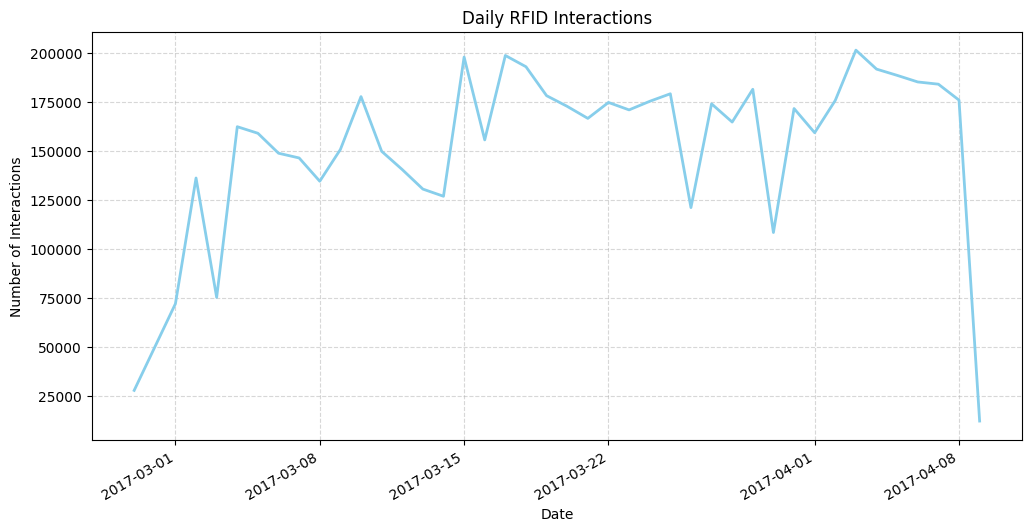

In [ ]:
# Daily activity
daily_counts = df_clean.groupby('date').size()

# Plot
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', color='skyblue', linewidth=2)
plt.title('Daily RFID Interactions')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

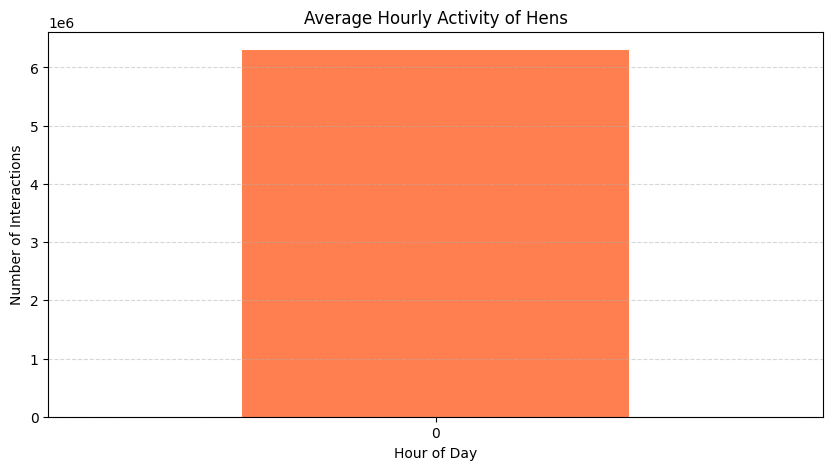

In [ ]:
# Hourly activity
df_clean['hour'] = df_clean['time'].dt.hour

# Count interactions per hour
hourly_counts = df_clean.groupby('hour').size()

# Plot
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='coral')
plt.title('Average Hourly Activity of Hens')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

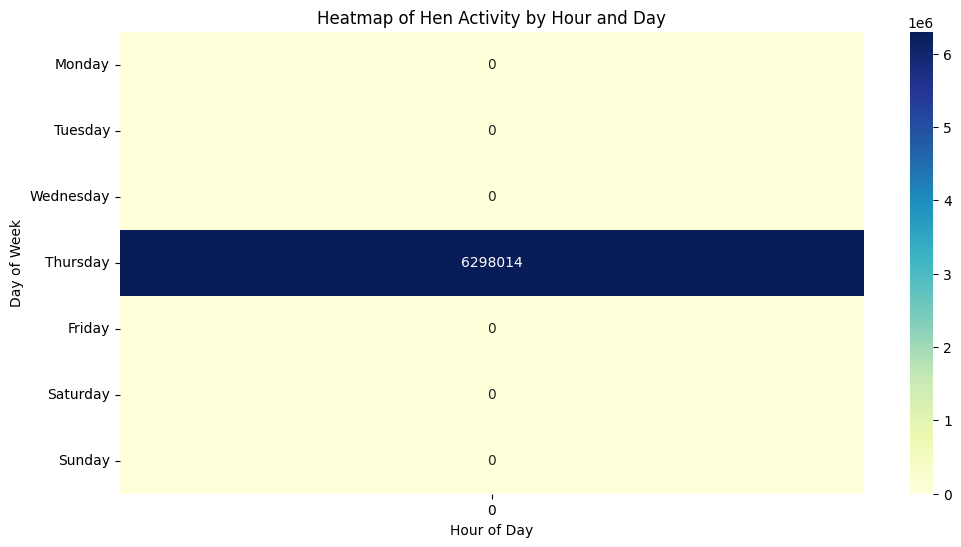

In [ ]:
df_clean['day_of_week'] = df_clean['time'].dt.day_name()

heatmap_data = df_clean.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

heatmap_data = heatmap_data.fillna(0).astype(int)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Hen Activity by Hour and Day')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()


# Contact Graph

In [ ]:
edge_list = df_clean[['V1', 'V2']].dropna()
G = nx.Graph()
G.add_edges_from(edge_list.itertuples(index=False, name=None))

In [ ]:
print("Number of nodes (hens):", G.number_of_nodes())
print("Number of edges (contacts):", G.number_of_edges())

Number of nodes (hens): 1804
Number of edges (contacts): 597047


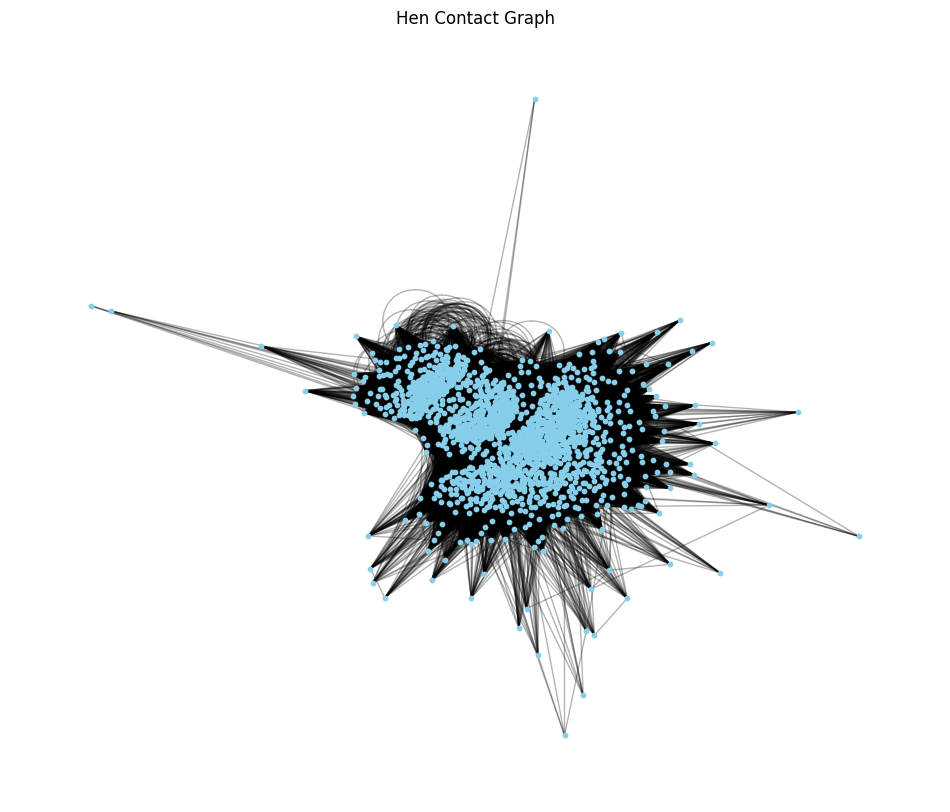

In [ ]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.1)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Hen Contact Graph")
plt.axis('off')
plt.show()

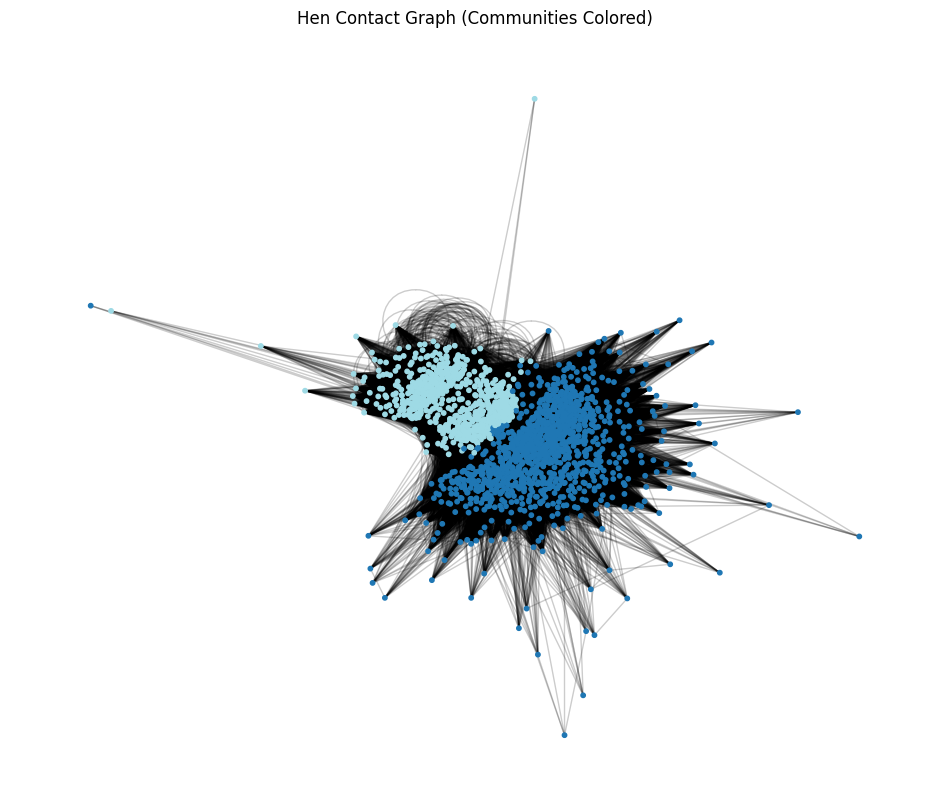

In [ ]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
node_colors = {}
for i, com in enumerate(communities):
    for node in com:
        node_colors[node] = i

colors = [node_colors[node] for node in G.nodes()]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.1)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=colors, cmap=plt.cm.tab20)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Hen Contact Graph (Communities Colored)")
plt.axis('off')
plt.show()

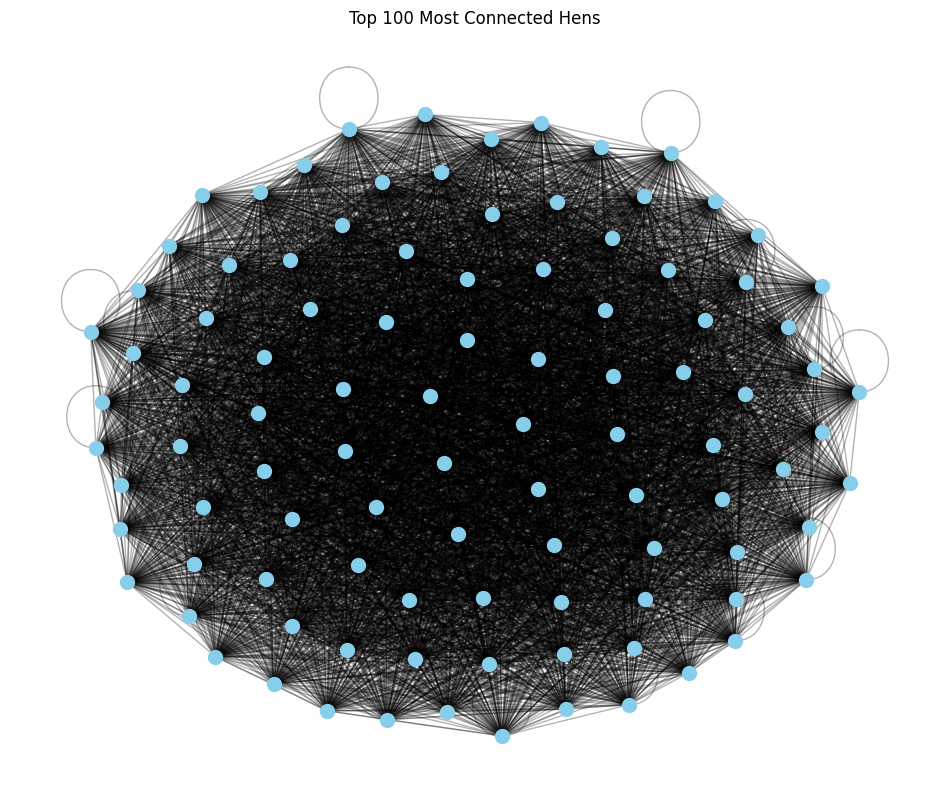

In [ ]:
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:100]
top_nodes_list = [node for node, deg in top_nodes]
subgraph = G.subgraph(top_nodes_list)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(subgraph, seed=42, k=0.3)
nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='skyblue')
nx.draw_networkx_edges(subgraph, pos, alpha=0.3)
plt.title("Top 100 Most Connected Hens")
plt.axis('off')
plt.show()


In [ ]:
degree_centrality = nx.degree_centrality(G)
top_hens = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Most Connected Hens:")
for hen, centrality in top_hens:
    print(f"Hen {hen}: Centrality {centrality:.4f}")


Top 5 Most Connected Hens:
Hen CA0000001691: Centrality 0.8303
Hen CA0000001528: Centrality 0.8292
Hen CA0000001784: Centrality 0.8209
Hen CA0000001404: Centrality 0.8109
Hen CA0000000688: Centrality 0.8070


In [ ]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G)
print("Number of communities:", len(communities))
for i, com in enumerate(communities[:5]):
    print(f"Community {i+1} size:", len(com))

Number of communities: 2
Community 1 size: 1110
Community 2 size: 694


In [ ]:
nx.write_gexf(G, "/content/drive/MyDrive/Hens Mobility/data/hen_contact_graph.gexf")
print("Graph saved as GEXF for interactive exploration in Gephi/Cytoscape.")

# Temporal Graph Analysis

In [ ]:
daily_graphs = {}
for date, daily_data in df_clean.groupby('date'):
    daily_edges = daily_data[['V1', 'V2']].dropna()
    G_day = nx.Graph()
    G_day.add_edges_from(daily_edges.itertuples(index=False, name=None))
    daily_graphs[date] = G_day

print("Created daily graphs for", len(daily_graphs), "days")

Created daily graphs for 41 days


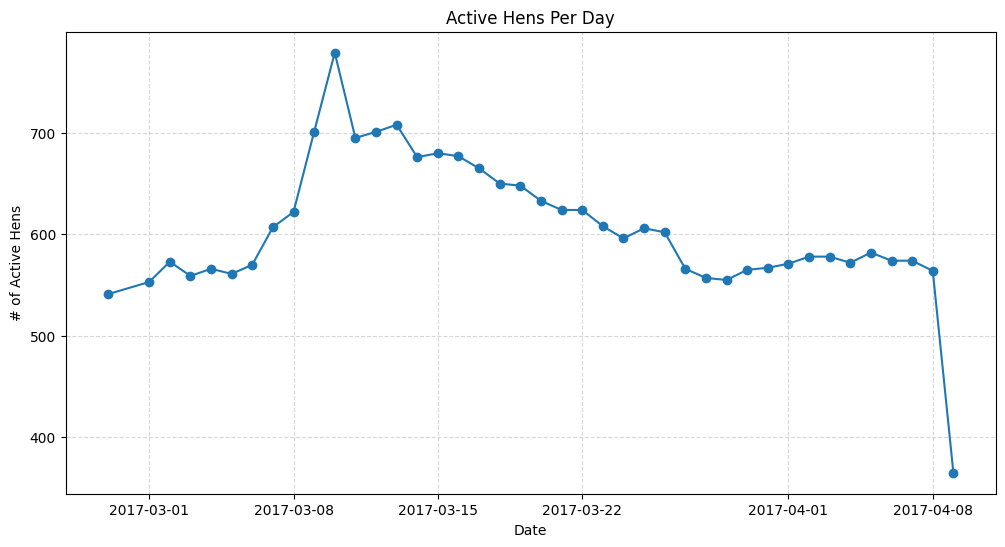

In [ ]:
# Plot active hens per day
active_hens_per_day = {date: G_day.number_of_nodes() for date, G_day in daily_graphs.items()}
plt.figure(figsize=(12, 6))
plt.plot(list(active_hens_per_day.keys()), list(active_hens_per_day.values()), marker='o')
plt.title("Active Hens Per Day")
plt.xlabel("Date")
plt.ylabel("# of Active Hens")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

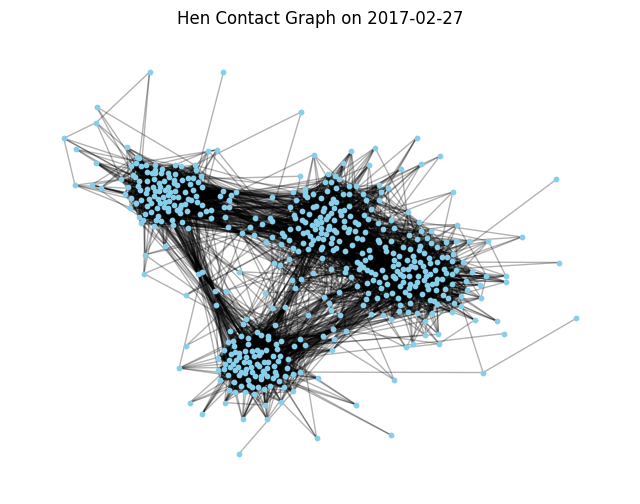

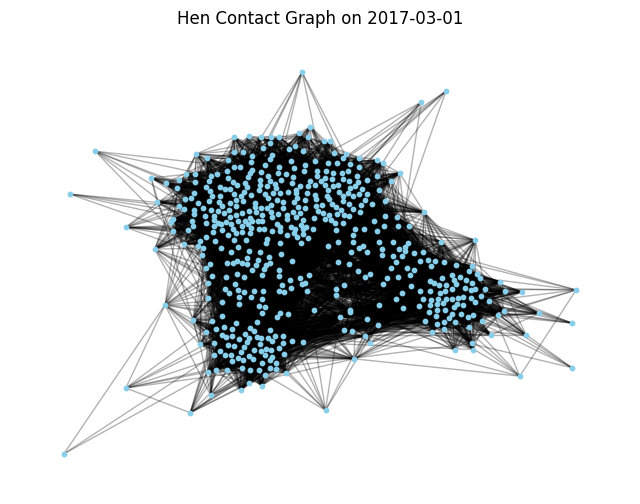

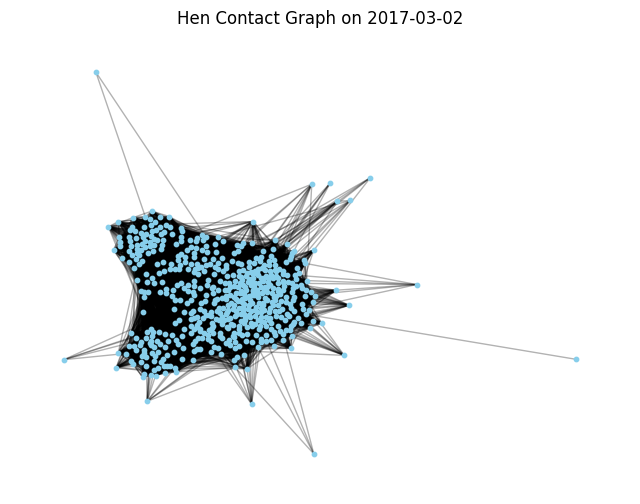

In [ ]:
# Visualize sample daily graphs
sample_dates = list(daily_graphs.keys())[:3]

for date in sample_dates:
    G_day = daily_graphs[date]
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_day, seed=42, k=0.2)
    nx.draw_networkx_nodes(G_day, pos, node_size=10, node_color='skyblue')
    nx.draw_networkx_edges(G_day, pos, alpha=0.3)
    plt.title(f"Hen Contact Graph on {date.date()}")
    plt.axis('off')
    plt.show()


# Hen Behavior Analysis

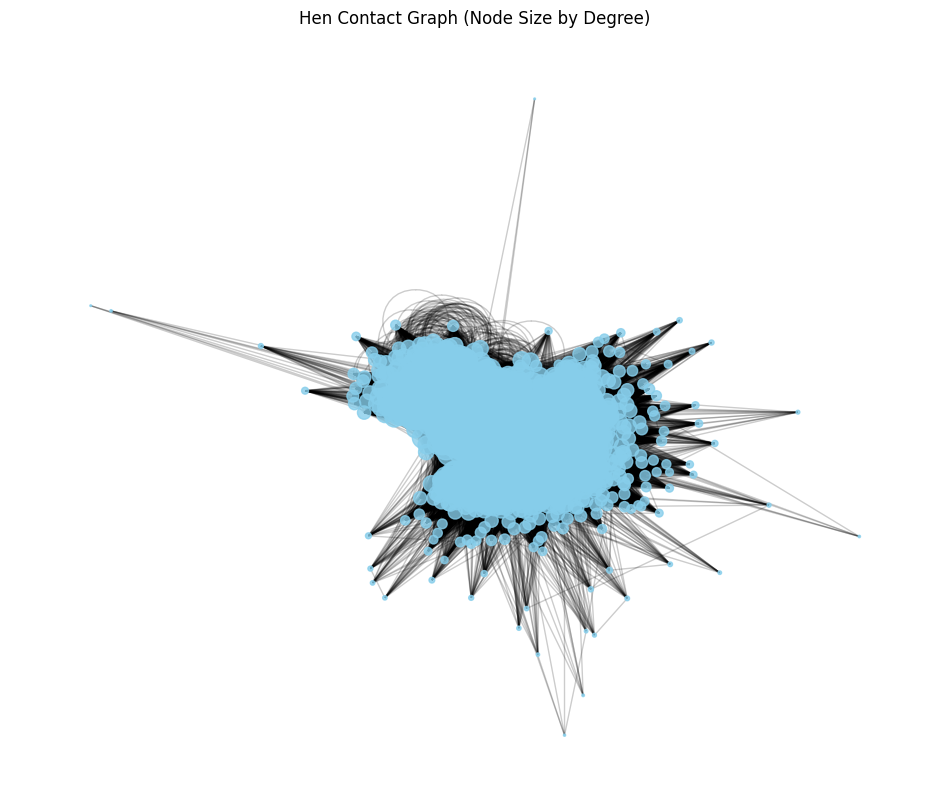

In [ ]:
degrees = dict(G.degree())
node_sizes = [degrees[n] * 0.5 for n in G.nodes()]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42, k=0.1)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Hen Contact Graph (Node Size by Degree)")
plt.axis('off')
plt.show()

In [ ]:
# Explorers & stable hens
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / len(degrees)

# Explorers: degree much higher than average
explorers = [node for node, deg in degrees.items() if deg > avg_degree * 2]
# Stable hens: degree much lower than average
stable_hens = [node for node, deg in degrees.items() if deg < avg_degree * 0.5]

print("Explorers (highly connected):", explorers[:10])
print("Stable hens (few connections):", stable_hens[:10])


Explorers (highly connected): ['CA0000001410', 'CA0000001542', 'CA0000001762', 'CA0000002476', 'CA0000002132', 'CA0000002494', 'CA0000001697', 'CA0000001378', 'CA0000001689', 'CA0000001776']
Stable hens (few connections): ['CA0000001392', 'CA0000000944', 'CA0000001683', 'CA0000001626', 'CA0000001414', 'CA0000001239', 'CA0000002421', 'CA0000001990', 'CA0000001589', 'CA0000002161']


In [ ]:
# Hubs/leaders by betweenness centrality
bet_centrality = nx.betweenness_centrality(G)
top_leaders = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 leader hens (by betweenness centrality):")
for hen, centrality in top_leaders:
    print(f"Hen {hen}: {centrality:.4f}")


Top 10 leader hens (by betweenness centrality):
Hen CA0000001528: 0.0029
Hen CA0000001691: 0.0028
Hen CA0000001784: 0.0028
Hen CA0000001646: 0.0025
Hen CA0000001542: 0.0023
Hen CA0000001888: 0.0023
Hen CA0000001404: 0.0023
Hen CA0000001378: 0.0023
Hen CA0000001762: 0.0023
Hen CA0000000688: 0.0022


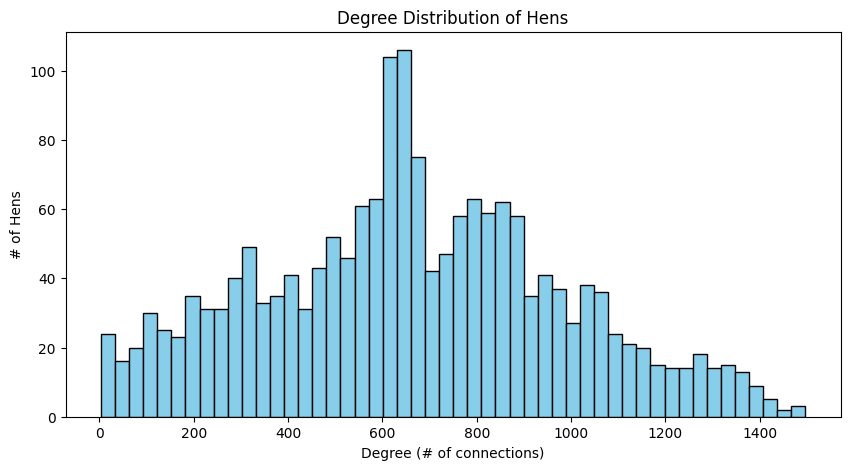

In [ ]:
# Degree distribution
degrees = dict(G.degree())
plt.figure(figsize=(10, 5))
plt.hist(list(degrees.values()), bins=50, color='skyblue', edgecolor='k')
plt.title("Degree Distribution of Hens")
plt.xlabel("Degree (# of connections)")
plt.ylabel("# of Hens")
plt.show()

In [ ]:
centrality = nx.degree_centrality(G)
top_hens = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 central hens:", top_hens)

Top 10 central hens: [('CA0000001691', 0.8302828618968386), ('CA0000001528', 0.8291735995562951), ('CA0000001784', 0.8208541320022186), ('CA0000001404', 0.8108707709373267), ('CA0000000688', 0.8069883527454244), ('CA0000001378', 0.7936772046589019), ('CA0000002285', 0.7892401552967278), ('CA0000001742', 0.7864669994453689), ('CA0000001946', 0.7864669994453689), ('CA0000001403', 0.7809206877426512)]
